<a href="https://colab.research.google.com/github/cphann/fresh-produce-detector/blob/main/fresh_spoiled_produce_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we are focusing on training an image classification model that can detect if a fruit is spoiled or not.

In [ ]:
# relevant imports
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')
!mkdir /content/images
!cp attempt_spoiled_fruit.zip /content/images
os.chdir('/content/images')
!unzip attempt_spoiled_fruit.zip
if os.path.exists('images/_MACOSX'):
    # Delete the "MACOSX" directory
    !rm -r _MACOSX

Streaming output truncated to the last 5000 lines.
  inflating: attempt_spoiled_fruit/Spoiled/rottenStrawberry (284).jpg  
  inflating: __MACOSX/attempt_spoiled_fruit/Spoiled/._rottenStrawberry (284).jpg  
  inflating: attempt_spoiled_fruit/Spoiled/rottenCarrot (200).jpg  
  inflating: __MACOSX/attempt_spoiled_fruit/Spoiled/._rottenCarrot (200).jpg  
  inflating: attempt_spoiled_fruit/Spoiled/rottenBanana (552).jpg  
  inflating: __MACOSX/attempt_spoiled_fruit/Spoiled/._rottenBanana (552).jpg  
  inflating: attempt_spoiled_fruit/Spoiled/rottenPotato (564).jpg  
  inflating: __MACOSX/attempt_spoiled_fruit/Spoiled/._rottenPotato (564).jpg  
  inflating: attempt_spoiled_fruit/Spoiled/rottenPepper (137).jpg  
  inflating: __MACOSX/attempt_spoiled_fruit/Spoiled/._rottenPepper (137).jpg  
  inflating: attempt_spoiled_fruit/Spoiled/rottenCucumber (554).jpg  
  inflating: __MACOSX/attempt_spoiled_fruit/Spoiled/._rottenCucumber (554).jpg  
  inflating: attempt_spoiled_fruit/Spoiled/rottenPepper

In [ ]:
data_dir = 'attempt_spoiled_fruit'

In [ ]:
# Define data transformations and load datasets
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
os.getcwd()

'/content/images'

In [ ]:
# Create an ImageFolder dataset from the data directory
dataset = datasets.ImageFolder(data_dir, transform=transform)

# Define the split ratio (e.g., 80% for training, 20% for validation)
split_ratio = 0.8

# Calculate the number of samples for the train and validation sets
num_samples = len(dataset)
split_point = int(split_ratio * num_samples)

# Split the dataset into training and validation subsets
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [split_point, num_samples - split_point])

# Create data loaders for both sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

In [ ]:
# Load a pretrained model and modify the final layer
model = models.resnet18(weights='DEFAULT')
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # 2 classes for binary classification
model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 87.7MB/s]


In [ ]:
from PIL import Image

# Get rid of transparancy issue in images
image_dir1 = 'attempt_spoiled_fruit/Fresh'
image_dir2 = 'attempt_spoiled_fruit/Spoiled'

# Iterate over each image in the directory
for filename in os.listdir(image_dir1):
      if filename.endswith('.png') or filename.endswith('.jpg'):  # Assuming the images are PNG format
        # Open the image
        image_path = os.path.join(image_dir1, filename)
        img = Image.open(image_path)

        # Convert the image to RGBA format if it has transparency
        if img.mode == 'P' and 'transparency' in img.info:
            img = img.convert('RGBA')

            # Save the converted image
            img.save(image_path)


for filename in os.listdir(image_dir2):
      if filename.endswith('.png') or filename.endswith('.jpg'):  # Assuming the images are PNG format
        # Open the image
        image_path = os.path.join(image_dir2, filename)
        img = Image.open(image_path)

        # Convert the image to RGBA format if it has transparency
        if img.mode == 'P' and 'transparency' in img.info:
            img = img.convert('RGBA')

            # Save the converted image
            img.save(image_path)

In [ ]:
# Training loop
model.to(device)
for epoch in range(10):  # Adjust the number of epochs
    running_loss = 0.0
    predicted_labels = []
    true_labels = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to the GPU

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        predicted_labels.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)

    print(f'Epoch {epoch + 1} - Loss: {running_loss / len(train_loader):.4f}, Accuracy: {accuracy:.4f}')

Epoch 1 - Loss: 0.3008, Accuracy: 0.8810
Epoch 2 - Loss: 0.1912, Accuracy: 0.9297
Epoch 3 - Loss: 0.1561, Accuracy: 0.9427
Epoch 4 - Loss: 0.1366, Accuracy: 0.9503
Epoch 5 - Loss: 0.1116, Accuracy: 0.9577
Epoch 6 - Loss: 0.1165, Accuracy: 0.9599
Epoch 7 - Loss: 0.1002, Accuracy: 0.9623
Epoch 8 - Loss: 0.0995, Accuracy: 0.9629
Epoch 9 - Loss: 0.0951, Accuracy: 0.9653
Epoch 10 - Loss: 0.0757, Accuracy: 0.9722


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save the fine-tuned model
torch.save(model.state_dict(), '/content/drive/MyDrive/produce_detection/fine_tuned_produce.pth')

NameError: name 'model' is not defined

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import numpy as np

# Load the fine-tuned model
loaded_model = models.resnet18()
num_features = loaded_model.fc.in_features
loaded_model.fc = nn.Linear(num_features, 2)  # Ensure the architecture matches
loaded_model.load_state_dict(torch.load('/content/drive/MyDrive/produce_detection/fine_tuned_produce.pth'))
loaded_model.eval()

In [ ]:
# Define a function to predict labels for multiple images
def predict_labels(image_paths):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    predictions = []

    for image_path in image_paths:
        img = Image.open(image_path)
        img = transform(img)
        img = img.unsqueeze(0)  # Add batch dimension

        with torch.no_grad():
            output = loaded_model(img)
            _, predicted = torch.max(output, 1)
            predictions.append(predicted.item())  # Assuming binary classification

    return predictions

In [ ]:
# Function to run the model on the validation dataset and print incorrect predictions
def evaluate_model(model, val_loader, dataset):
    incorrect_preds = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    loaded_model.to(device)

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = loaded_model(inputs)
            _, preds = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                if preds[i] != labels[i]:
                    img_path = dataset.samples[val_loader.dataset.indices[i]][0]  # Get image path
                    incorrect_preds.append((img_path, dataset.classes[preds[i].item()], dataset.classes[labels[i].item()]))

    return incorrect_preds

# Get incorrect predictions
incorrect_predictions = evaluate_model(loaded_model, val_loader, dataset)

# Print the results
for img_path, pred, actual in incorrect_predictions:
    print(f"File: {img_path}, Prediction: {pred}, Actual: {actual}")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


File: attempt_spoiled_fruit/Fresh/freshCarrot (386).jpg, Prediction: Spoiled, Actual: Fresh
File: attempt_spoiled_fruit/Fresh/freshTomato (222).jpg, Prediction: Spoiled, Actual: Fresh
File: attempt_spoiled_fruit/Fresh/freshPepper (594).jpg, Prediction: Spoiled, Actual: Fresh
File: attempt_spoiled_fruit/Fresh/freshOrange (91).jpg, Prediction: Spoiled, Actual: Fresh
File: attempt_spoiled_fruit/Fresh/freshPepper (290).jpg, Prediction: Spoiled, Actual: Fresh
File: attempt_spoiled_fruit/Fresh/freshCarrot (597).jpg, Prediction: Spoiled, Actual: Fresh
File: attempt_spoiled_fruit/Fresh/freshPotato (4).jpg, Prediction: Spoiled, Actual: Fresh
File: attempt_spoiled_fruit/Fresh/freshApple (542).png, Prediction: Spoiled, Actual: Fresh
File: attempt_spoiled_fruit/Fresh/freshPotato (576).jpg, Prediction: Spoiled, Actual: Fresh
File: attempt_spoiled_fruit/Fresh/freshCucumber (236).jpg, Prediction: Spoiled, Actual: Fresh
File: attempt_spoiled_fruit/Fresh/freshTomato (279).JPG, Prediction: Spoiled, Actu

In [ ]:
from collections import defaultdict

# Define a dictionary to store the counts for each category
category_counts = defaultdict(int)

# Define a function to extract specific categories from filenames
def extract_category(filename):
    # Split the filename by '/' and take the last part
    category = filename.split('/')[-1]
    # Remove numbers and convert to lowercase
    category = ''.join(filter(lambda x: not x.isdigit(), category)).lower()
    return category

# Iterate over the incorrect predictions
for img_path, pred, actual in incorrect_predictions:
    # Extract the category from the filename
    category = extract_category(img_path)
    # Increment the count for the predicted category
    category_counts[category] += 1

# Print the counts for each category
for category, count in category_counts.items():
    print(f"{category.capitalize()}: {count}")


Freshcarrot ().jpg: 85
Freshtomato ().jpg: 81
Freshpepper ().jpg: 123
Freshorange ().jpg: 36
Freshpotato ().jpg: 163
Freshapple ().png: 39
Freshcucumber ().jpg: 38
Freshorange ().png: 36
Freshmango ().png: 36
Freshbanana ().jpg: 36
Rottenapple ().jpg: 82
Rottencucumber ().jpg: 116
Rottenorange ().jpg: 115
Rottentomato ().jpg: 40
Rottenstrawberry ().jpg: 114
Rottenmango ().jpg: 32
Rottenpotato ().jpg: 77


Now, looking into object detection!

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
from torchvision import models

model = models.detection.fasterrcnn_resnet50_fpn(weights='DEFAULT')
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

FRUITS = ['apple', 'banana', 'orange', 'carrot']

# Function to get predictions
def get_prediction(img_path, threshold):
    # Load the image
    img = Image.open(img_path)
    # Define PyTorch Transform
    transform = transforms.Compose([transforms.ToTensor()])
    # Apply the transform to the image
    img = transform(img)
    # Pass the image to the model
    pred = model([img])

    pred_boxes = []
    pred_class = []

    # Iterate through predictions
    for i, label in enumerate(pred[0]['labels']):
        label_id = label.item()
        # Check if the label corresponds to one of the fruits or vegetables
        if COCO_INSTANCE_CATEGORY_NAMES[label_id] in FRUITS:
            score = pred[0]['scores'][i].item()
            # Check if the score is above the threshold
            if score > threshold:
                # Get bounding box coordinates
                box = pred[0]['boxes'][i].detach().numpy()
                pred_boxes.append([(box[0], box[1]), (box[2], box[3])])
                pred_class.append(COCO_INSTANCE_CATEGORY_NAMES[label_id])

    return pred_boxes, pred_class

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:03<00:00, 45.0MB/s]


In [ ]:
import cv2
import matplotlib.pyplot as plt

def object_detection_api(img_path, threshold=0.8, rect_th=3, text_size=0.5, text_th=1):
  # Get predictions
  boxes, pred_cls = get_prediction(img_path, threshold)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  for i in range(len(boxes)):
    # Draw Rectangle with the coordinates
    cv2.rectangle(img, (int(boxes[i][0][0]), int(boxes[i][0][1])), (int(boxes[i][1][0]), int(boxes[i][1][1])), color=(0, 255, 0), thickness=rect_th)
    #cv2.rectangle(img, boxes[i][0], boxes[i][1], color=(0, 255, 0), thickness=rect_th)
    # Write the prediction class
    cv2.putText(img,pred_cls[i], (int(boxes[i][0][0]), int(boxes[i][0][1])),  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th)
    #cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th)
  plt.figure(figsize=(20,30)) # display the output image
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [ ]:
object_detection_api ("attempt_spoiled_fruit/Fresh/freshApple (585).png")
object_detection_api ("attempt_spoiled_fruit/Fresh/freshBanana (242).jpg")
object_detection_api ("attempt_spoiled_fruit/Fresh/freshCarrot (579).jpg")
object_detection_api ("attempt_spoiled_fruit/Fresh/freshOrange (22).jpg")
object_detection_api ("attempt_spoiled_fruit/Fresh/freshOrange (162).jpg")


AttributeError: 'Tensor' object has no attribute 'read'

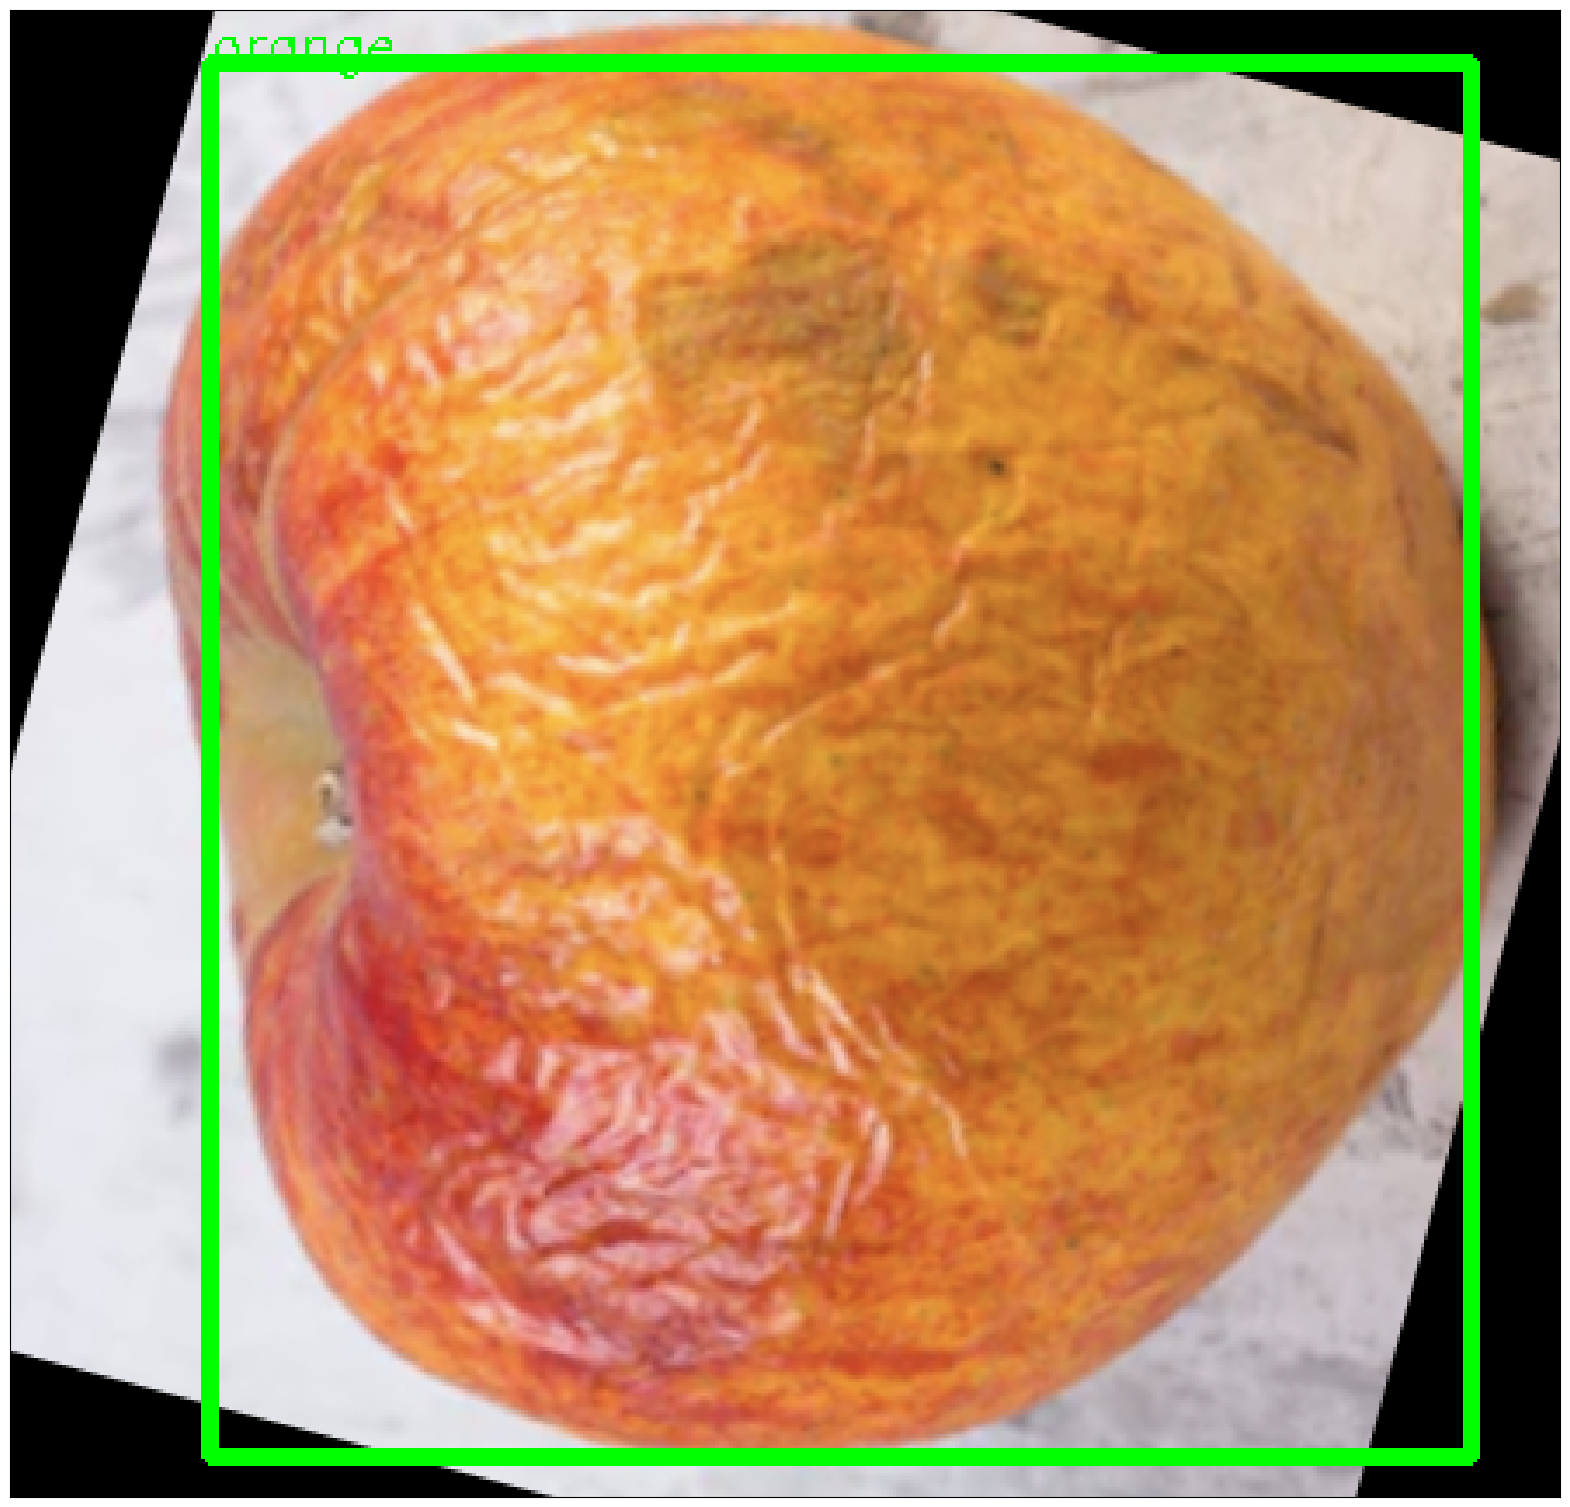

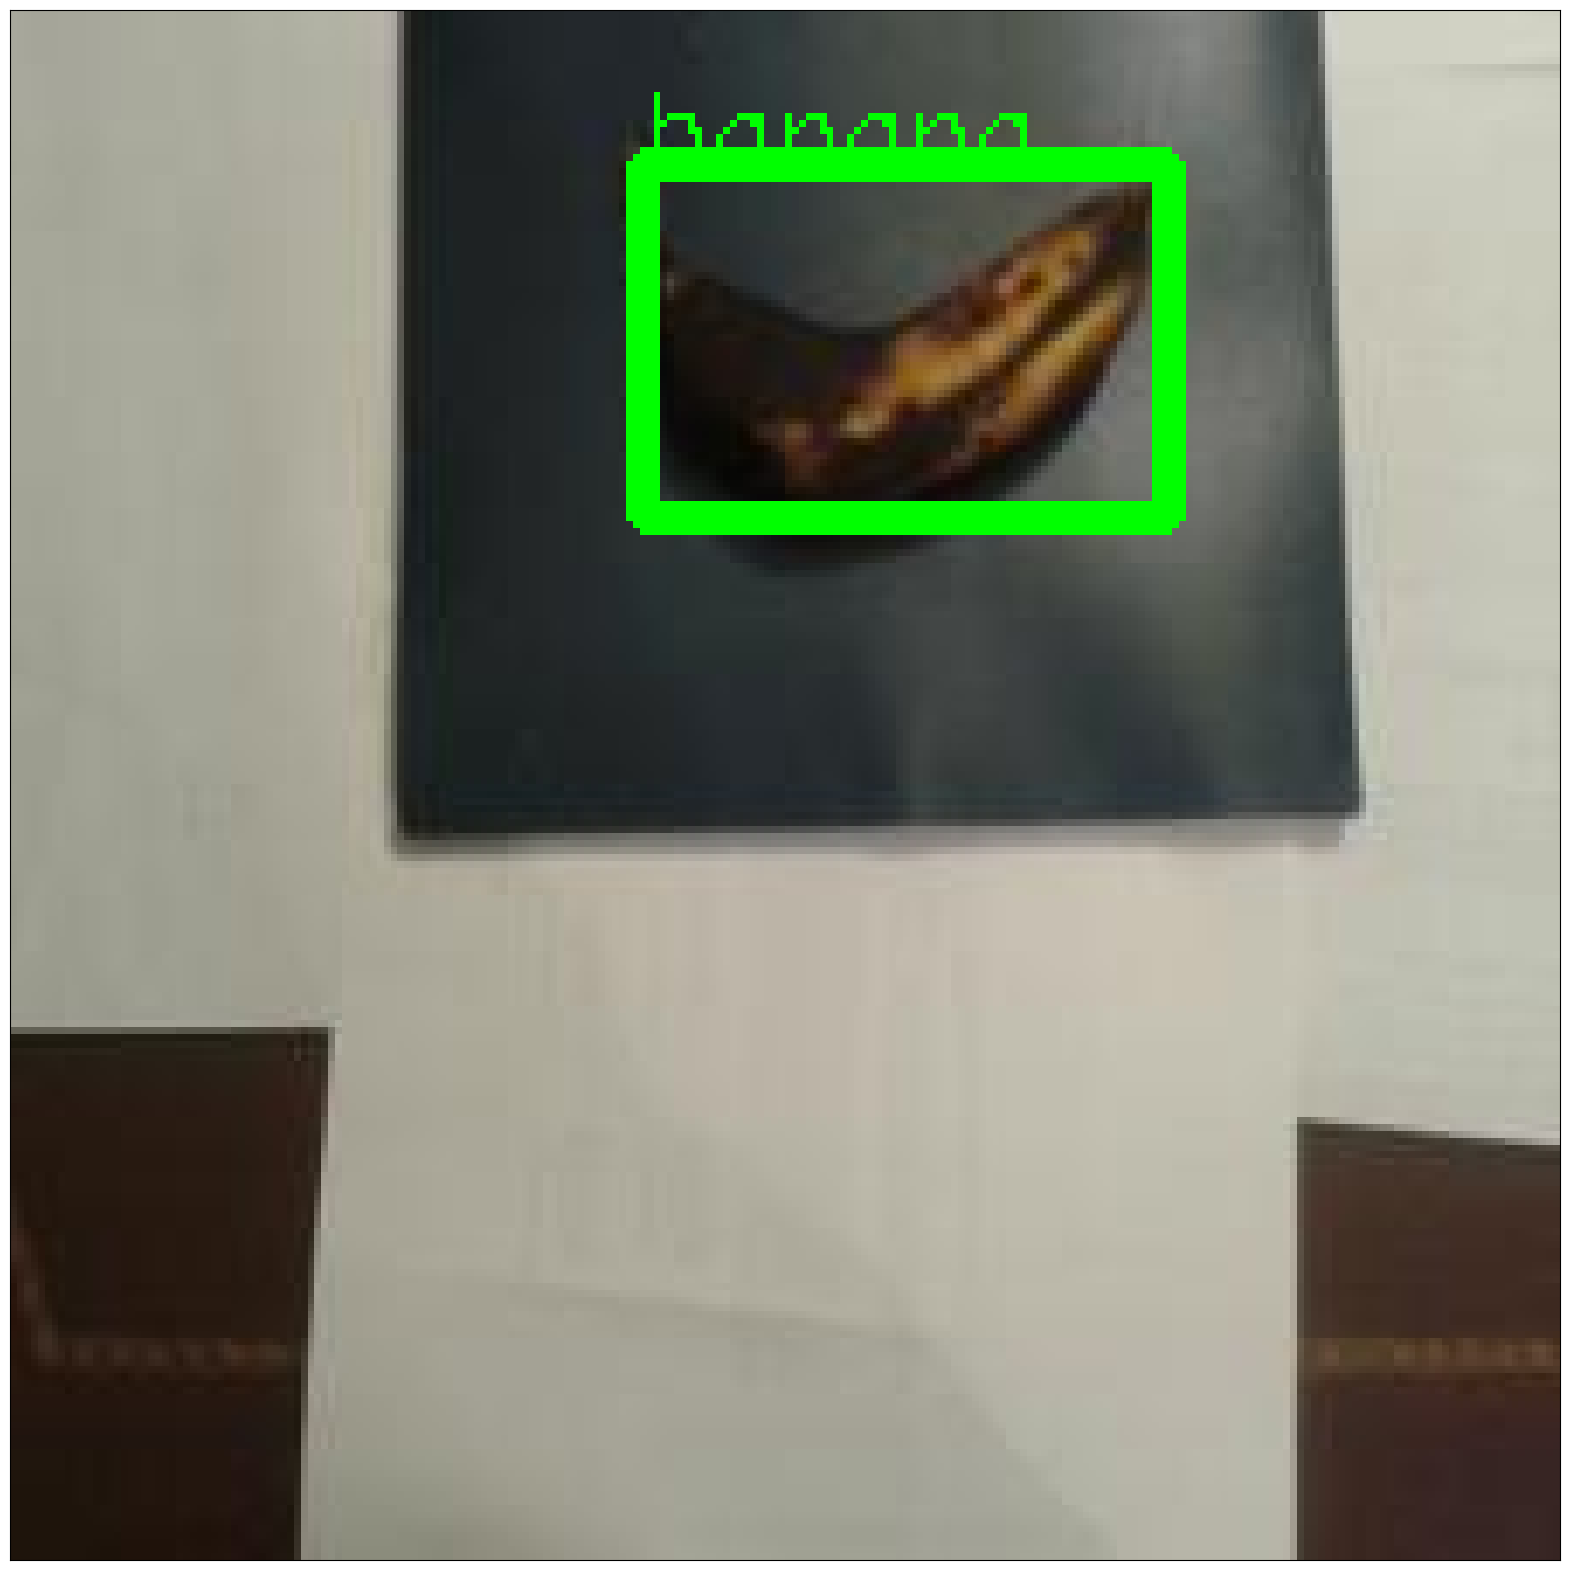

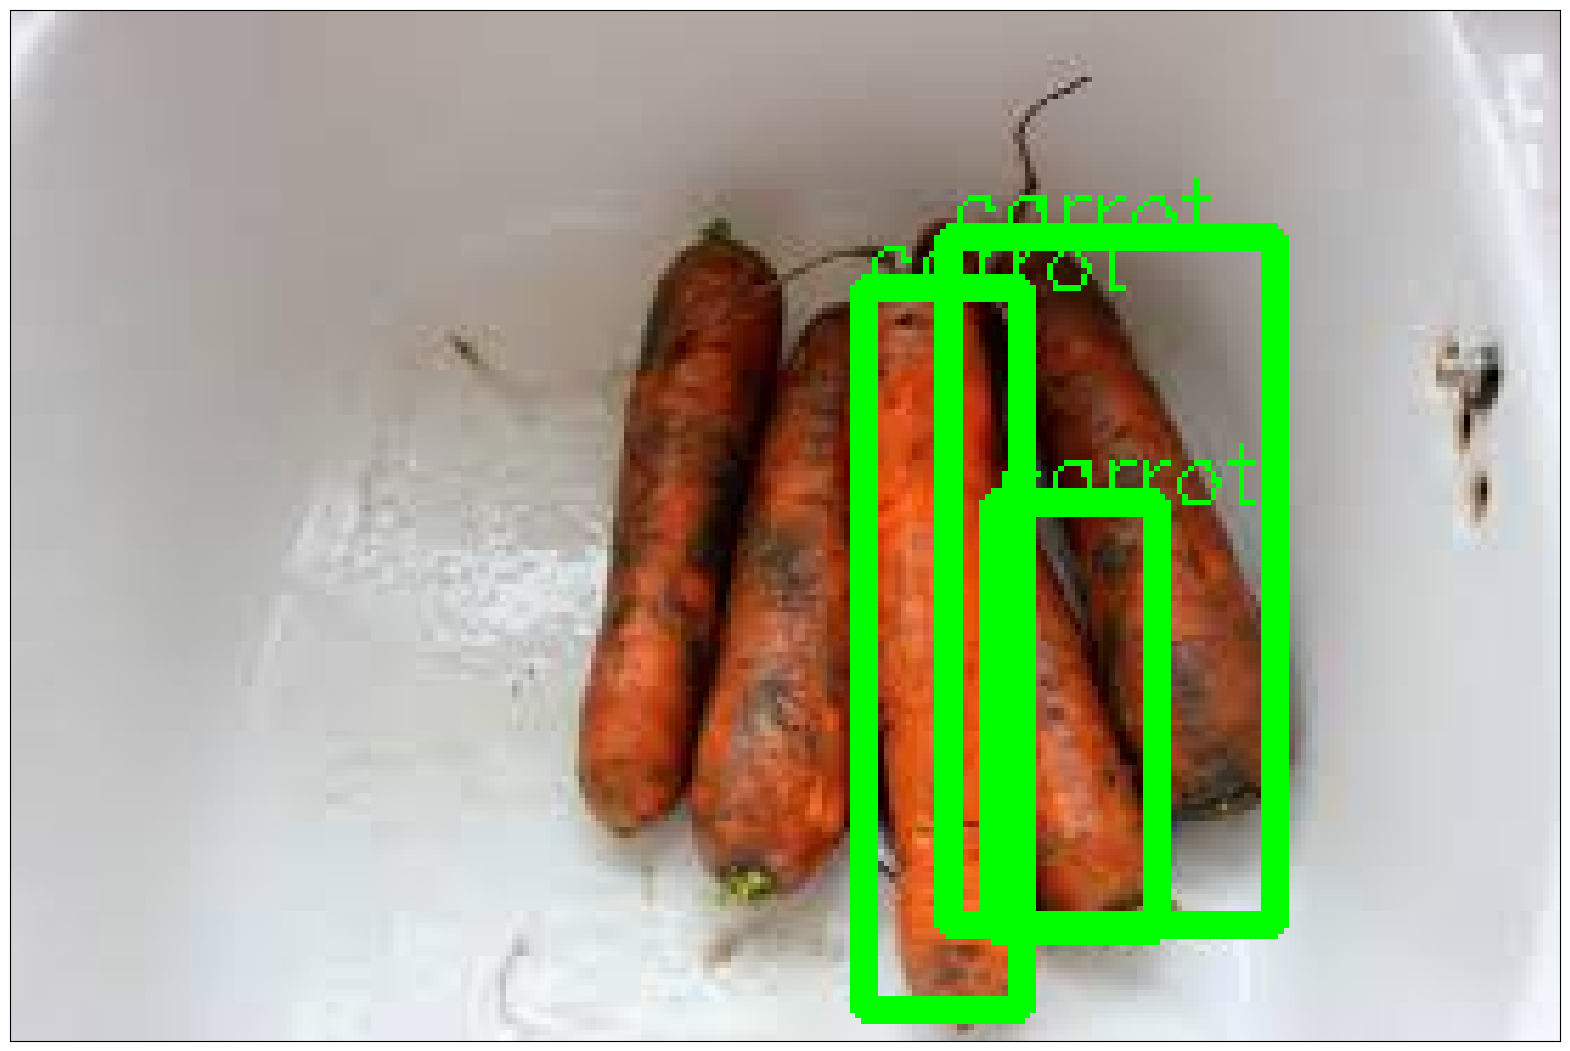

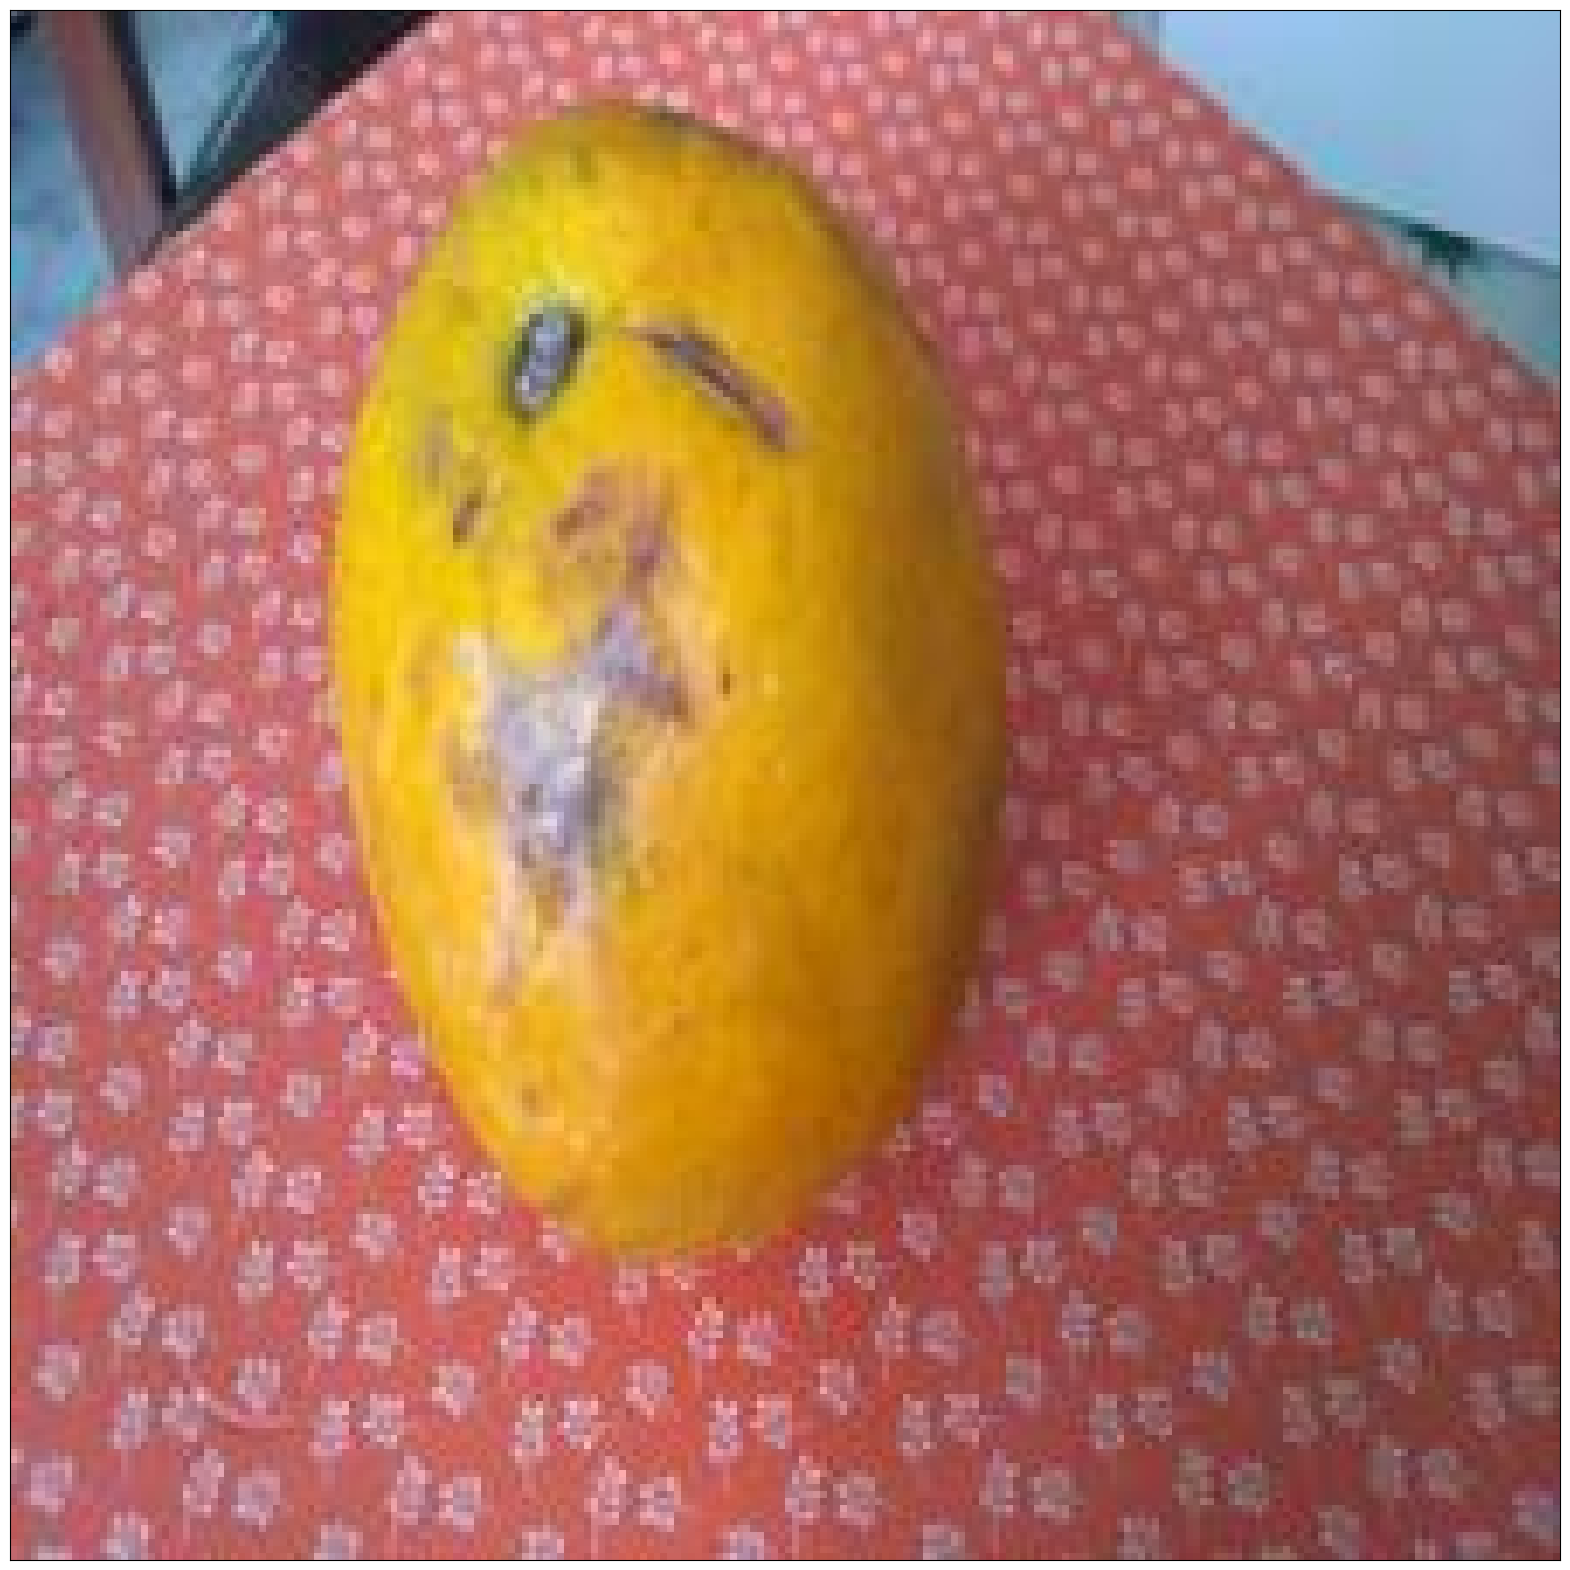

In [ ]:
object_detection_api ("attempt_spoiled_fruit/Spoiled/rottenApple (197).jpg")
object_detection_api ("attempt_spoiled_fruit/Spoiled/rottenBanana (365).jpg")
object_detection_api ("attempt_spoiled_fruit/Spoiled/rottenCarrot (541).jpg")
object_detection_api ("attempt_spoiled_fruit/Spoiled/rottenOrange (308).jpg")